In [1]:
# required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neural_network
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

meanfreq: mean frequency (in kHz)
sd: standard deviation of frequency
median: median frequency (in kHz)
Q25: first quartile (in kHz)
Q75: third quartile (in kHz)
IQR: interquartile range (in kHz)
skew: skewness 
kurt: kurtosis 
sp.ent: spectral entropy
sfm: spectral flatness
mode: mode frequency
centroid: frequency centroid (see specprop)
peakf: peak frequency (frequency with highest energy)
meanfun: average of fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: average of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
label: male or female

In [2]:
# loading datasets
data=pd.read_csv("voice.csv")
data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [4]:
data=pd.DataFrame(data)
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [5]:
## adding a column having label as numericals like male-0 and female-1 

labelnum=[]
for i in range(len(data)):
    if(data["label"][i]=="male"):
        labelnum.append(0)
    else:
        labelnum.append(1)
data["labelnum"]=labelnum
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,labelnum
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female,1


In [6]:
data.isnull().sum()
#print(data['labelnum'].value_counts())
print(data['label'].value_counts())

male      1584
female    1584
Name: label, dtype: int64


In [7]:
print(data.describe(),end="\n \n")
print(data.groupby('label').size())

          meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  ...  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  ...   
mean      0.084309     3.140168    36.568461     0.895127     0.408216  ...   
std       0.042783     4.240529   134.928661     0.044980     0.177521  ...   
min       0.01455

# visualization

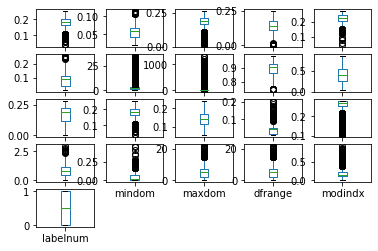

In [8]:
#visualization

data.plot(kind='box',subplots=True,layout=(5,5),sharex=False,sharey=False)
plt.show()
#sns.boxplot(x='label',y='meanfreq',data=data)

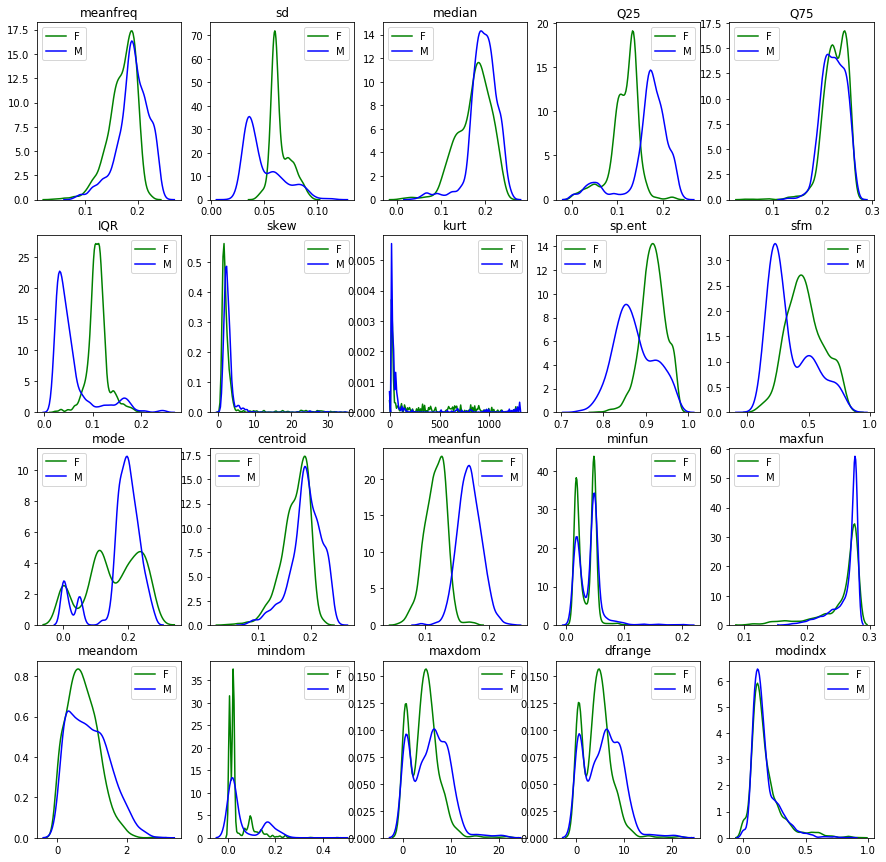

In [9]:
#import seaborn as sns
#import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(data.columns[i-1])
    sns.kdeplot(data.loc[data['labelnum'] == 0, data.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(data.loc[data['labelnum'] == 1, data.columns[i-1]], color= 'blue', label='M')

In [10]:
corr_matrix=data.corr()  #correlation 

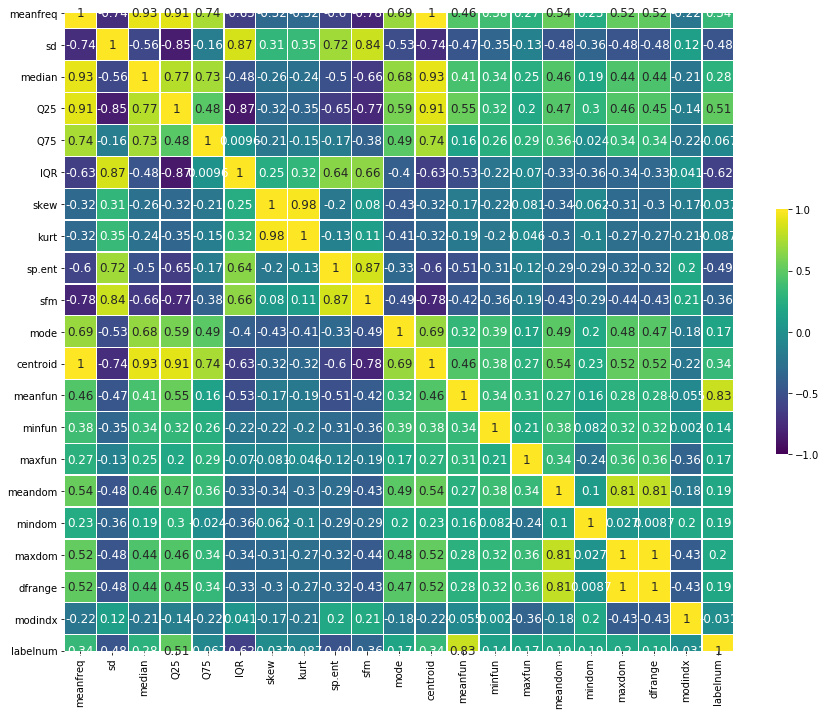

In [11]:
f,ax = plt.subplots(figsize=(15, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .4,
                      cmap = 'viridis',
                      cbar_kws = {'shrink': .3, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [12]:
#some of the features correlated each other and with target 
#select such highly correlated features

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 22 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
labelnum    3168 non-null int64
dtypes: float64(20), int64(1), object(1)
memory usage: 544.6+ KB


In [14]:
X=data[['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']].values
Y=data[['labelnum']].values

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100,shuffle=True)

In [16]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=100,shuffle=True)

In [17]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((1900, 20), (1900, 1), (634, 20), (634, 1), (634, 20), (634, 1))

In [18]:
print(X_train)
y_train

[[ 0.2049856   0.03356965  0.2114094  ...  3.5859375   3.5625
   0.10941828]
 [ 0.20190017  0.04856089  0.19380456 ...  5.546875    5.3828125
   0.15940143]
 [ 0.1915278   0.05990247  0.17589134 ...  4.828125    4.8046875
   0.16260163]
 ...
 [ 0.17316515  0.07172436  0.16094488 ...  8.296875    8.2734375
   0.12112396]
 [ 0.10039942  0.07283457  0.08172518 ...  4.34375     4.3359375
   0.34486486]
 [ 0.19407251  0.03572872  0.19309042 ... 10.078125   10.0546875
   0.11679293]]


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [19]:
lg=LogisticRegression()

In [20]:
lg.fit(X_train, y_train)
lg.score(X_train,y_train)
y_pred=lg.predict(X_val)
logreg=accuracy_score(y_val, y_pred)
print(logreg)

0.9022082018927445


In [21]:
y_pred=lg.predict(X_test)
logreg=accuracy_score(y_test,y_pred)
print(logreg)

0.8848580441640379


In [22]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
y_pred=svc.predict(X_val)
svcscorelinear=accuracy_score(y_val,y_pred)
print(svcscorelinear)

0.917981072555205


In [23]:
y_pred=svc.predict(X_test)
svcscorelinear=accuracy_score(y_test,y_pred)
print(svcscorelinear)

0.9037854889589906


In [24]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
y_pred=svc.predict(X_val)
svcscorerbf=accuracy_score(y_val,y_pred)
print(svcscorerbf)

0.7381703470031545


In [25]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
y_pred=knn.predict(X_val)
knnscore=accuracy_score(y_val,y_pred)
print(knnscore)

0.7097791798107256


In [26]:
nb=naive_bayes.GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_train,y_train)
y_pred=nb.predict(X_val)
nbscore=accuracy_score(y_val,y_pred)
print(nbscore)

0.88801261829653


In [27]:
dt=tree.DecisionTreeClassifier(max_depth=21,random_state=101,max_features=None,min_samples_leaf=20)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_val)
dtscore=accuracy_score(y_val,y_pred)
print(dtscore)

0.9668769716088328


In [28]:
mlp=neural_network.MLPClassifier(hidden_layer_sizes=(8,8,8),activation='logistic',max_iter=500)
mlp.fit(X_train,y_train)
mlp.score(X_train,y_train)
y_pred=mlp.predict(X_val)
mlpscore=accuracy_score(y_val,y_pred)
print(mlpscore)

0.9479495268138801


In [29]:
models=[]
models.append(logreg)
models.append(logreg)
models.append(nbscore)
models.append(dtscore)
models.append(mlpscore)
models.append(nbscore)
algos=[]
algos.append('Logistic regression')
algos.append('SVM')
algos.append('KNN')
algos.append('DT')
algos.append('NN')
algos.append('Naive bayes')


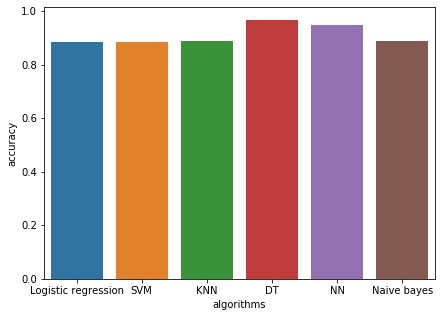

In [30]:
plt.subplots(figsize=(7,5))
sns.barplot(x=algos,y=models)
plt.xlabel('algorithms')
plt.ylabel('accuracy')
#plt.xticks(models)
plt.show()

In [67]:
X1=data[['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','mode']].values
Y1=data[['labelnum']].values

In [68]:
#splitting data into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=100,shuffle=True)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2534, 9), (2534, 1), (634, 9), (634, 1))

In [69]:
lg=LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_train,y_train)
y_pred=lg.predict(X_test)
logreg=accuracy_score(y_test, y_pred)
print(logreg)

0.8659305993690851


In [70]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
y_pred=svc.predict(X_test)
svcscore=accuracy_score(y_test,y_pred)
print(svcscore)

0.8817034700315457


In [71]:
knn=neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
y_pred=knn.predict(X_test)
knnscore=accuracy_score(y_test,y_pred)
print(knnscore)

0.777602523659306


In [72]:
dt=tree.DecisionTreeClassifier(max_depth=21,random_state=101,max_features=None,min_samples_leaf=20)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dtscore=accuracy_score(y_test,y_pred)
print(dtscore)

0.9100946372239748


In [73]:
mlp=neural_network.MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',max_iter=500)
mlp.fit(X_train,y_train)
mlp.score(X_train,y_train)
y_pred=mlp.predict(X_test)
mlpscore=accuracy_score(y_test,y_pred)
print(mlpscore)

0.8517350157728707


In [74]:
nb=naive_bayes.GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_train,y_train)
y_pred=nb.predict(X_test)
nbscore=accuracy_score(y_test,y_pred)
print(nbscore)

0.8485804416403786


,'skew','kurt','mode','meanfun','minfun','maxfun','meandom','mindom','maxdom','modindx'

In [75]:
import librosa
from IPython.display import Audio
from librosa import display
Audio("myvoice.wav")

In [ ]:
#from pydub import AudioSegment
#sound=AudioSegment.from_mp4("myvoice.mp4")
#sound.export("myvoice1.wav",format="wav")

In [76]:
sample,sampling_rate=librosa.load("myvoice.wav",sr=None,mono=True,offset=0.0,duration=None)

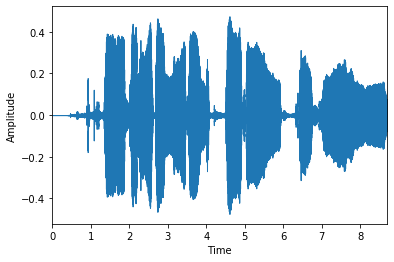

In [89]:
from librosa import display
plt.figure()
librosa.display.waveplot(y=sample,sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [78]:
print(sampling_rate)

44100


In [79]:
spec = np.abs(np.fft.rfft(sample))
freq = np.fft.rfftfreq(len(sample), d=1 / sampling_rate)
spec = np.abs(spec)
amp = spec / spec.sum()
mean = (freq * amp).sum()
sd = np.sqrt(np.sum(amp * ((freq - mean) ** 2)))
amp_cumsum = np.cumsum(amp)
median = freq[len(amp_cumsum[amp_cumsum <= 0.5]) + 1]
mode = freq[amp.argmax()]
Q25 = freq[len(amp_cumsum[amp_cumsum <= 0.25]) + 1]
Q75 = freq[len(amp_cumsum[amp_cumsum <= 0.75]) + 1]
IQR = Q75 - Q25
z = amp - amp.mean()
w = amp.std()
skew = ((z ** 3).sum() / (len(spec) - 1)) / w ** 3
kurt = ((z ** 4).sum() / (len(spec) - 1)) / w ** 4
result_d = {
        'mean': mean,
        'sd': sd,
        'median': median,
        'Q25': Q25,
        'Q75': Q75,
        'IQR': IQR,
        'skew': skew,
        'kurt': kurt,
        'mode': mode
}
print(result_d)

{'mean': 2648.3514557117387, 'sd': 3287.5979230944627, 'median': 955.7296875, 'Q25': 536.89453125, 'Q75': 3332.765625, 'IQR': 2795.87109375, 'skew': 16.926366318230514, 'kurt': 418.7456815166899, 'mode': 536.6648437499999}


In [80]:
#[['meanfreq','median','Q25','Q75','IQR','skew','kurt']].

In [90]:
X_pred=[list(result_d.values())]
y_pred=dt.predict(X_pred)
if(y_pred==1):
    print("Female")
else:
    print("Male")

Female


In [ ]:
#demo
#% pylab inline
import os
import glob
#data,sampling_rate=librosa.load("myvoice.wav",sr=None)
plt.figure(figsize=(12,4))
librosa.display.waveplot(sample)

In [87]:
from converter import Converter
c=Converter()
conv = c.convert('myvoice.mp4', 'myvoice1.wav', {'format': 'wav','audio': {'codec': 'pcm','samplerate': 44100,'channels': 2}})


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(" This is the metric converter ")? (converter.py, line 1)